#### Importando as Libs

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from functools import reduce
import pickle
import warnings
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from ydata_profiling import ProfileReport
import os
from dateutil.relativedelta import relativedelta

from scipy.stats import norm
import statistics as st





CONFIG

In [2]:
# Ignorar avisos
warnings.filterwarnings('ignore')

# Configurações de exibição do Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)

VERIFICANDO GPUs DISPONÍVEIS

Este código verifica quantas GPUs estão disponíveis para o TensorFlow. Isso é importante para determinar o hardware que será usado durante o treinamento do modelo, já que GPUs podem acelerar significativamente o processo.

In [3]:
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

#### Coleta de Dados

In [4]:
df = pd.read_csv('DATA\DF_CLUSTER.csv', encoding='latin-1', on_bad_lines='skip', sep=';')

#### Exploração e Análise dos Dados

Aqui o objetivo desta análise é ter uma visão geral do conjunto de dados, compreendendo seu tamanho, variaveis, tipo de dados, e período dos dados coletados.

In [5]:
#Tamanho do conjunto de dados. X Linhas, e Y Colunas
df.shape

(72014, 31)

In [6]:
#Visão geral das 5 primeiras linhas do conjunto de dados
df.head()

,PROD_CESTA_RELACIONAMENTO,PROD_DEBITO_CONTA,PROD_CHEQUE_ESPECIAL,PROD_CARTAO_CREDITO,PROD_CARTAO_DEBITO,PROD_CREDITO_RURAL,PROD_CREDITO_GERAL,PROD_DEPOSITO_A_PRAZO,PROD_POUPANCA,PROD_FUNDOS,PROD_PREVIDENCIA,PROD_SEGURO_AUTOMOVEL,PROD_SEGURO_RESIDENCIAL,PROD_SEGURO_RURAL,PROD_SEGURO_PATR,PROD_SEGURO_VIDA,PROD_CONSORCIO_MOTOS,PROD_CONSORCIO_IMOVEIS,PROD_CONSORCIO_SERVICOS,PROD_CONSORCIO_PESADOS,PROD_CONSORCIO_AUTOMOVEIS,PROD_COBRANCA,PROD_DOMICILIO,PROD_DESC_REB,PROD_FOLHA_PAGAMENTO,PROD_CAPITAL_SOCIAL,PROD_CANAIS,PROD_CUSTODIA_CHEQUE,PROD_PAGAMENTOS,PROD_CRED_FINANC,PROD_PAGTO_FORN
0,N,N,N,N,N,N,N,N,S,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
1,N,N,N,N,N,N,N,N,S,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
2,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
3,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
4,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N


In [7]:
#Visão geral das 5 ultimas linhas do conjunto de dados
df.tail()

,PROD_CESTA_RELACIONAMENTO,PROD_DEBITO_CONTA,PROD_CHEQUE_ESPECIAL,PROD_CARTAO_CREDITO,PROD_CARTAO_DEBITO,PROD_CREDITO_RURAL,PROD_CREDITO_GERAL,PROD_DEPOSITO_A_PRAZO,PROD_POUPANCA,PROD_FUNDOS,PROD_PREVIDENCIA,PROD_SEGURO_AUTOMOVEL,PROD_SEGURO_RESIDENCIAL,PROD_SEGURO_RURAL,PROD_SEGURO_PATR,PROD_SEGURO_VIDA,PROD_CONSORCIO_MOTOS,PROD_CONSORCIO_IMOVEIS,PROD_CONSORCIO_SERVICOS,PROD_CONSORCIO_PESADOS,PROD_CONSORCIO_AUTOMOVEIS,PROD_COBRANCA,PROD_DOMICILIO,PROD_DESC_REB,PROD_FOLHA_PAGAMENTO,PROD_CAPITAL_SOCIAL,PROD_CANAIS,PROD_CUSTODIA_CHEQUE,PROD_PAGAMENTOS,PROD_CRED_FINANC,PROD_PAGTO_FORN
72009,S,N,S,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
72010,S,S,N,S,N,N,N,S,N,S,N,S,N,N,N,N,N,N,N,N,N,N,N,N,N,S,S,N,N,N,N
72011,S,N,N,N,N,N,N,N,S,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,S,S,N,S,N,N
72012,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
72013,S,N,S,S,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,S,N,N,N,N,N


In [8]:
#Visualizando algumas medidas estatisticas
df.describe()

,PROD_CESTA_RELACIONAMENTO,PROD_DEBITO_CONTA,PROD_CHEQUE_ESPECIAL,PROD_CARTAO_CREDITO,PROD_CARTAO_DEBITO,PROD_CREDITO_RURAL,PROD_CREDITO_GERAL,PROD_DEPOSITO_A_PRAZO,PROD_POUPANCA,PROD_FUNDOS,PROD_PREVIDENCIA,PROD_SEGURO_AUTOMOVEL,PROD_SEGURO_RESIDENCIAL,PROD_SEGURO_RURAL,PROD_SEGURO_PATR,PROD_SEGURO_VIDA,PROD_CONSORCIO_MOTOS,PROD_CONSORCIO_IMOVEIS,PROD_CONSORCIO_SERVICOS,PROD_CONSORCIO_PESADOS,PROD_CONSORCIO_AUTOMOVEIS,PROD_COBRANCA,PROD_DOMICILIO,PROD_DESC_REB,PROD_FOLHA_PAGAMENTO,PROD_CAPITAL_SOCIAL,PROD_CANAIS,PROD_CUSTODIA_CHEQUE,PROD_PAGAMENTOS,PROD_CRED_FINANC,PROD_PAGTO_FORN
count,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
freq,42830,66207,56849,57131,54515,72013,60510,62219,50525,71570,69847,69954,69333,71995,71969,68088,71383,71756,70940,71960,71266,71759,71547,71953,72013,60949,43438,71901,56056,71405,72009


In [9]:
#Informações básicas sobre tipos de variáveis
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72014 entries, 0 to 72013
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   PROD_CESTA_RELACIONAMENTO  72014 non-null  object
 1   PROD_DEBITO_CONTA          72014 non-null  object
 2   PROD_CHEQUE_ESPECIAL       72014 non-null  object
 3   PROD_CARTAO_CREDITO        72014 non-null  object
 4   PROD_CARTAO_DEBITO         72014 non-null  object
 5   PROD_CREDITO_RURAL         72014 non-null  object
 6   PROD_CREDITO_GERAL         72014 non-null  object
 7   PROD_DEPOSITO_A_PRAZO      72014 non-null  object
 8   PROD_POUPANCA              72014 non-null  object
 9   PROD_FUNDOS                72014 non-null  object
 10  PROD_PREVIDENCIA           72014 non-null  object
 11  PROD_SEGURO_AUTOMOVEL      72014 non-null  object
 12  PROD_SEGURO_RESIDENCIAL    72014 non-null  object
 13  PROD_SEGURO_RURAL          72014 non-null  object
 14  PROD_S

In [10]:
#Total de valores únicos de cada variável
#Se uma variável só tiver 1 valor, é sinal que não irá impactar no modelo e pode retira-lo do treinamento
lista_vlr_unicos = []


for i in df.columns[0:11].tolist():
	print(i, " : ", len(df[i].astype(str).value_counts()))
	lista_vlr_unicos.append(len(df[i].astype(str).value_counts()))

PROD_CESTA_RELACIONAMENTO  :  2
PROD_DEBITO_CONTA  :  2
PROD_CHEQUE_ESPECIAL  :  2
PROD_CARTAO_CREDITO  :  2
PROD_CARTAO_DEBITO  :  2
PROD_CREDITO_RURAL  :  2
PROD_CREDITO_GERAL  :  2
PROD_DEPOSITO_A_PRAZO  :  2
PROD_POUPANCA  :  2
PROD_FUNDOS  :  2
PROD_PREVIDENCIA  :  2


### APLICANDO DUMMYS

In [11]:
df = pd.get_dummies(df)

In [12]:
df.head()

,PROD_CESTA_RELACIONAMENTO_N,PROD_CESTA_RELACIONAMENTO_S,PROD_DEBITO_CONTA_N,PROD_DEBITO_CONTA_S,PROD_CHEQUE_ESPECIAL_N,PROD_CHEQUE_ESPECIAL_S,PROD_CARTAO_CREDITO_N,PROD_CARTAO_CREDITO_S,PROD_CARTAO_DEBITO_N,PROD_CARTAO_DEBITO_S,PROD_CREDITO_RURAL_N,PROD_CREDITO_RURAL_S,PROD_CREDITO_GERAL_N,PROD_CREDITO_GERAL_S,PROD_DEPOSITO_A_PRAZO_N,PROD_DEPOSITO_A_PRAZO_S,PROD_POUPANCA_N,PROD_POUPANCA_S,PROD_FUNDOS_N,PROD_FUNDOS_S,PROD_PREVIDENCIA_N,PROD_PREVIDENCIA_S,PROD_SEGURO_AUTOMOVEL_N,PROD_SEGURO_AUTOMOVEL_S,PROD_SEGURO_RESIDENCIAL_N,PROD_SEGURO_RESIDENCIAL_S,PROD_SEGURO_RURAL_N,PROD_SEGURO_RURAL_S,PROD_SEGURO_PATR_N,PROD_SEGURO_PATR_S,PROD_SEGURO_VIDA_N,PROD_SEGURO_VIDA_S,PROD_CONSORCIO_MOTOS_N,PROD_CONSORCIO_MOTOS_S,PROD_CONSORCIO_IMOVEIS_N,PROD_CONSORCIO_IMOVEIS_S,PROD_CONSORCIO_SERVICOS_N,PROD_CONSORCIO_SERVICOS_S,PROD_CONSORCIO_PESADOS_N,PROD_CONSORCIO_PESADOS_S,PROD_CONSORCIO_AUTOMOVEIS_N,PROD_CONSORCIO_AUTOMOVEIS_S,PROD_COBRANCA_N,PROD_COBRANCA_S,PROD_DOMICILIO_N,PROD_DOMICILIO_S,PROD_DESC_REB_N,PROD_DESC_REB_S,PROD_FOLHA_PAGAMENTO_N,PROD_FOLHA_PAGAMENTO_S,PROD_CAPITAL_SOCIAL_N,PROD_CAPITAL_SOCIAL_S,PROD_CANAIS_N,PROD_CANAIS_S,PROD_CUSTODIA_CHEQUE_N,PROD_CUSTODIA_CHEQUE_S,PROD_PAGAMENTOS_N,PROD_PAGAMENTOS_S,PROD_CRED_FINANC_N,PROD_CRED_FINANC_S,PROD_PAGTO_FORN_N,PROD_PAGTO_FORN_S
0,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False
1,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False
2,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False
3,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False
4,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False


### NORMALIZAÇÃO

In [13]:
def is_binary(col):
    # Verificar se a coluna contém apenas 0 e 1
    unique_values = col.unique()
    return set(unique_values).issubset({0, 1})

# Verificar todas as colunas do DataFrame
#binary_columns = [col for col in df.columns if is_binary(df[col])]

# Exibir colunas binárias
#print(f"Colunas binárias: {binary_columns}")


In [14]:
# Identificar colunas binárias
#colunas_binarias = [col for col in df.columns if is_binary(df[col])]

In [15]:
# Identificar colunas não binárias
#colunas_nao_binarias = df.columns.difference(binary_columns)

In [16]:
# Exibir colunas binárias
#print(f"Colunas não binárias: {colunas_nao_binarias}")

In [17]:
# Aplicar a normalização apenas nas colunas não binárias
scaler = MinMaxScaler()
#try:
  #  df[colunas_nao_binarias] = scaler.fit_transform(df[colunas_nao_binarias])
#except:
   # pass

In [18]:
df.head()

,PROD_CESTA_RELACIONAMENTO_N,PROD_CESTA_RELACIONAMENTO_S,PROD_DEBITO_CONTA_N,PROD_DEBITO_CONTA_S,PROD_CHEQUE_ESPECIAL_N,PROD_CHEQUE_ESPECIAL_S,PROD_CARTAO_CREDITO_N,PROD_CARTAO_CREDITO_S,PROD_CARTAO_DEBITO_N,PROD_CARTAO_DEBITO_S,PROD_CREDITO_RURAL_N,PROD_CREDITO_RURAL_S,PROD_CREDITO_GERAL_N,PROD_CREDITO_GERAL_S,PROD_DEPOSITO_A_PRAZO_N,PROD_DEPOSITO_A_PRAZO_S,PROD_POUPANCA_N,PROD_POUPANCA_S,PROD_FUNDOS_N,PROD_FUNDOS_S,PROD_PREVIDENCIA_N,PROD_PREVIDENCIA_S,PROD_SEGURO_AUTOMOVEL_N,PROD_SEGURO_AUTOMOVEL_S,PROD_SEGURO_RESIDENCIAL_N,PROD_SEGURO_RESIDENCIAL_S,PROD_SEGURO_RURAL_N,PROD_SEGURO_RURAL_S,PROD_SEGURO_PATR_N,PROD_SEGURO_PATR_S,PROD_SEGURO_VIDA_N,PROD_SEGURO_VIDA_S,PROD_CONSORCIO_MOTOS_N,PROD_CONSORCIO_MOTOS_S,PROD_CONSORCIO_IMOVEIS_N,PROD_CONSORCIO_IMOVEIS_S,PROD_CONSORCIO_SERVICOS_N,PROD_CONSORCIO_SERVICOS_S,PROD_CONSORCIO_PESADOS_N,PROD_CONSORCIO_PESADOS_S,PROD_CONSORCIO_AUTOMOVEIS_N,PROD_CONSORCIO_AUTOMOVEIS_S,PROD_COBRANCA_N,PROD_COBRANCA_S,PROD_DOMICILIO_N,PROD_DOMICILIO_S,PROD_DESC_REB_N,PROD_DESC_REB_S,PROD_FOLHA_PAGAMENTO_N,PROD_FOLHA_PAGAMENTO_S,PROD_CAPITAL_SOCIAL_N,PROD_CAPITAL_SOCIAL_S,PROD_CANAIS_N,PROD_CANAIS_S,PROD_CUSTODIA_CHEQUE_N,PROD_CUSTODIA_CHEQUE_S,PROD_PAGAMENTOS_N,PROD_PAGAMENTOS_S,PROD_CRED_FINANC_N,PROD_CRED_FINANC_S,PROD_PAGTO_FORN_N,PROD_PAGTO_FORN_S
0,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False
1,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False
2,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False
3,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False
4,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False


In [19]:
df.describe()

,PROD_CESTA_RELACIONAMENTO_N,PROD_CESTA_RELACIONAMENTO_S,PROD_DEBITO_CONTA_N,PROD_DEBITO_CONTA_S,PROD_CHEQUE_ESPECIAL_N,PROD_CHEQUE_ESPECIAL_S,PROD_CARTAO_CREDITO_N,PROD_CARTAO_CREDITO_S,PROD_CARTAO_DEBITO_N,PROD_CARTAO_DEBITO_S,PROD_CREDITO_RURAL_N,PROD_CREDITO_RURAL_S,PROD_CREDITO_GERAL_N,PROD_CREDITO_GERAL_S,PROD_DEPOSITO_A_PRAZO_N,PROD_DEPOSITO_A_PRAZO_S,PROD_POUPANCA_N,PROD_POUPANCA_S,PROD_FUNDOS_N,PROD_FUNDOS_S,PROD_PREVIDENCIA_N,PROD_PREVIDENCIA_S,PROD_SEGURO_AUTOMOVEL_N,PROD_SEGURO_AUTOMOVEL_S,PROD_SEGURO_RESIDENCIAL_N,PROD_SEGURO_RESIDENCIAL_S,PROD_SEGURO_RURAL_N,PROD_SEGURO_RURAL_S,PROD_SEGURO_PATR_N,PROD_SEGURO_PATR_S,PROD_SEGURO_VIDA_N,PROD_SEGURO_VIDA_S,PROD_CONSORCIO_MOTOS_N,PROD_CONSORCIO_MOTOS_S,PROD_CONSORCIO_IMOVEIS_N,PROD_CONSORCIO_IMOVEIS_S,PROD_CONSORCIO_SERVICOS_N,PROD_CONSORCIO_SERVICOS_S,PROD_CONSORCIO_PESADOS_N,PROD_CONSORCIO_PESADOS_S,PROD_CONSORCIO_AUTOMOVEIS_N,PROD_CONSORCIO_AUTOMOVEIS_S,PROD_COBRANCA_N,PROD_COBRANCA_S,PROD_DOMICILIO_N,PROD_DOMICILIO_S,PROD_DESC_REB_N,PROD_DESC_REB_S,PROD_FOLHA_PAGAMENTO_N,PROD_FOLHA_PAGAMENTO_S,PROD_CAPITAL_SOCIAL_N,PROD_CAPITAL_SOCIAL_S,PROD_CANAIS_N,PROD_CANAIS_S,PROD_CUSTODIA_CHEQUE_N,PROD_CUSTODIA_CHEQUE_S,PROD_PAGAMENTOS_N,PROD_PAGAMENTOS_S,PROD_CRED_FINANC_N,PROD_CRED_FINANC_S,PROD_PAGTO_FORN_N,PROD_PAGTO_FORN_S
count,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014,72014
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False
freq,42830,42830,66207,66207,56849,56849,57131,57131,54515,54515,72013,72013,60510,60510,62219,62219,50525,50525,71570,71570,69847,69847,69954,69954,69333,69333,71995,71995,71969,71969,68088,68088,71383,71383,71756,71756,70940,70940,71960,71960,71266,71266,71759,71759,71547,71547,71953,71953,72013,72013,60949,60949,43438,43438,71901,71901,56056,56056,71405,71405,72009,72009


### APLICANDO O PCA

In [20]:

def encontrar_melhor_pca(df, max_components):
    # Garantir que o número máximo de componentes não exceda o limite permitido
    max_components = min(max_components, df.shape[0], df.shape[1])
    
    melhor_inercia = float('inf')  # Melhor inércia (soma dos quadrados intra-cluster)
    melhor_pca = None  # Melhor número de componentes
    resultados = {
        'n_componentes': [],
        'inercia': [],
        'var_exp_acumulada': [],
        'silhouette_score': []
    }

    for n in range(1, max_components + 1):
        pca = PCA(n_components=n)
        df_pca = pca.fit_transform(df)  # Transformação PCA

        # Aplicar KMeans após o PCA
        kmeans = KMeans(n_clusters=2, random_state=42)
        kmeans.fit(df_pca)

        # Medir a inércia (quanto menor, melhor)
        inercia = kmeans.inertia_

        # Calcular a variância explicada acumulada
        var_exp_acumulada = np.sum(pca.explained_variance_ratio_)

        # Calcular o silhouette score
        silhouette_avg = silhouette_score(df_pca, kmeans.labels_)

        # Armazenar os resultados
        resultados['n_componentes'].append(n)
        resultados['inercia'].append(inercia)
        resultados['var_exp_acumulada'].append(var_exp_acumulada)
        resultados['silhouette_score'].append(silhouette_avg)

        # Atualizar o melhor PCA com base na menor inércia
        if inercia < melhor_inercia:
            melhor_inercia = inercia
            melhor_pca = n

    print(f"Melhor número de componentes PCA: {melhor_pca}, com inércia: {melhor_inercia:.4f}")
    return pd.DataFrame(resultados)

# Atualizar o número de componentes com base no seu dataset
resultados_pca = encontrar_melhor_pca(df, max_components=df.shape[1])


Melhor número de componentes PCA: 1, com inércia: 19433.3142


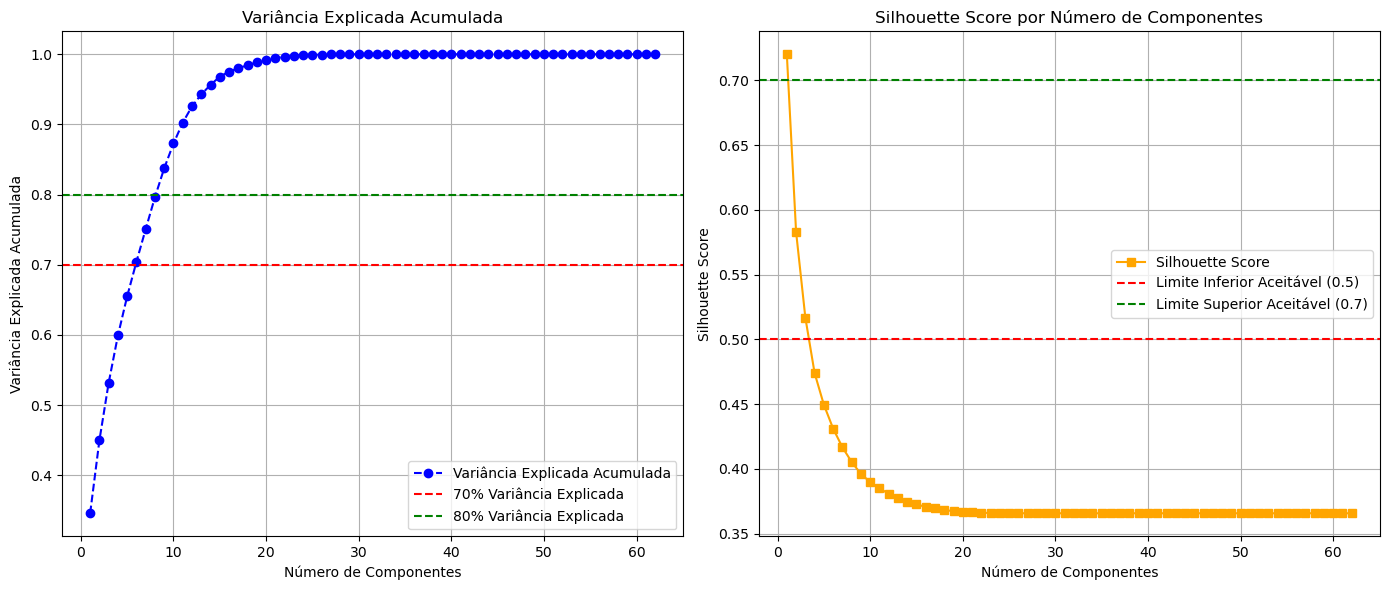

In [21]:

# Ajustar os gráficos conforme os resultados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Variância Explicada Acumulada
ax1.plot(resultados_pca['n_componentes'], resultados_pca['var_exp_acumulada'], marker='o', linestyle='--', color='b', label='Variância Explicada Acumulada')
ax1.axhline(y=0.70, color='r', linestyle='--', label='70% Variância Explicada')
ax1.axhline(y=0.80, color='g', linestyle='--', label='80% Variância Explicada')
ax1.set_xlabel('Número de Componentes')
ax1.set_ylabel('Variância Explicada Acumulada')
ax1.set_title('Variância Explicada Acumulada')
ax1.legend(loc='best')
ax1.grid(True)

# Gráfico 2: Silhouette Score
ax2.plot(resultados_pca['n_componentes'], resultados_pca['silhouette_score'], marker='s', linestyle='-', color='orange', label='Silhouette Score')
ax2.axhline(y=0.50, color='r', linestyle='--', label='Limite Inferior Aceitável (0.5)')
ax2.axhline(y=0.70, color='g', linestyle='--', label='Limite Superior Aceitável (0.7)')
ax2.set_xlabel('Número de Componentes')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score por Número de Componentes')
ax2.legend(loc='best')
ax2.grid(True)

plt.tight_layout()
plt.show()


APLICANDO O PCA

In [22]:
pca_componentes = PCA(n_components=2)  

In [23]:
pca = pca_componentes.fit_transform(df)

In [24]:
# Exibir a quantidade de variância explicada pelos componentes
explained_variance_ratio = pca_componentes.explained_variance_ratio_


In [25]:
# Determinar a quantidade de componentes que explica 95% da variância
variancia_acumulada = np.cumsum(explained_variance_ratio)  # Variância explicada acumulada
melhor_n_componentes = np.argmax(variancia_acumulada >= 0.95) + 1  # Número mínimo de componentes que explicam 95% da variância

### RESULTADOS - PCA

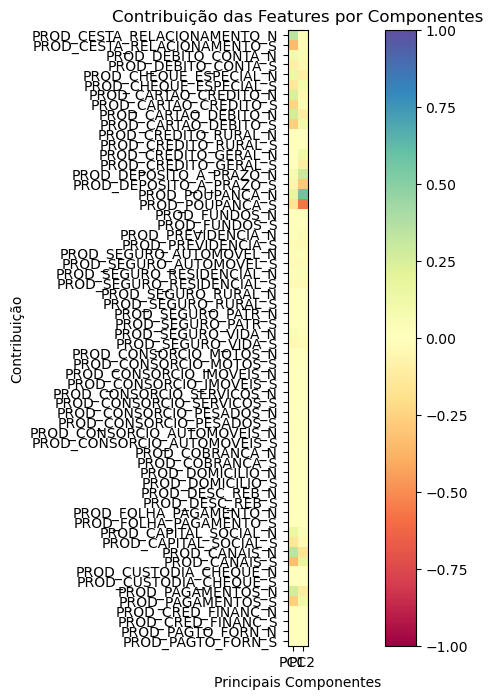

In [26]:
# Plotando a contribuição de cada feature nos componentes principais
fig, ax = plt.subplots(figsize=(20, 8))  # Aumentando a largura para 15 e altura para 6
plt.imshow(
    pca_componentes.components_.T,  # Transposta para exibir as features nas colunas
    cmap="Spectral",
    vmin=-1,
    vmax=1
)
plt.yticks(range(len(df.columns)), df.columns)
plt.xticks(range(pca_componentes.n_components_), [f'PC{i+1}' for i in range(pca_componentes.n_components_)])
plt.xlabel('Principais Componentes')
plt.ylabel('Contribuição')
plt.title('Contribuição das Features por Componentes')
plt.colorbar()

# Mostrando a figura
plt.show()


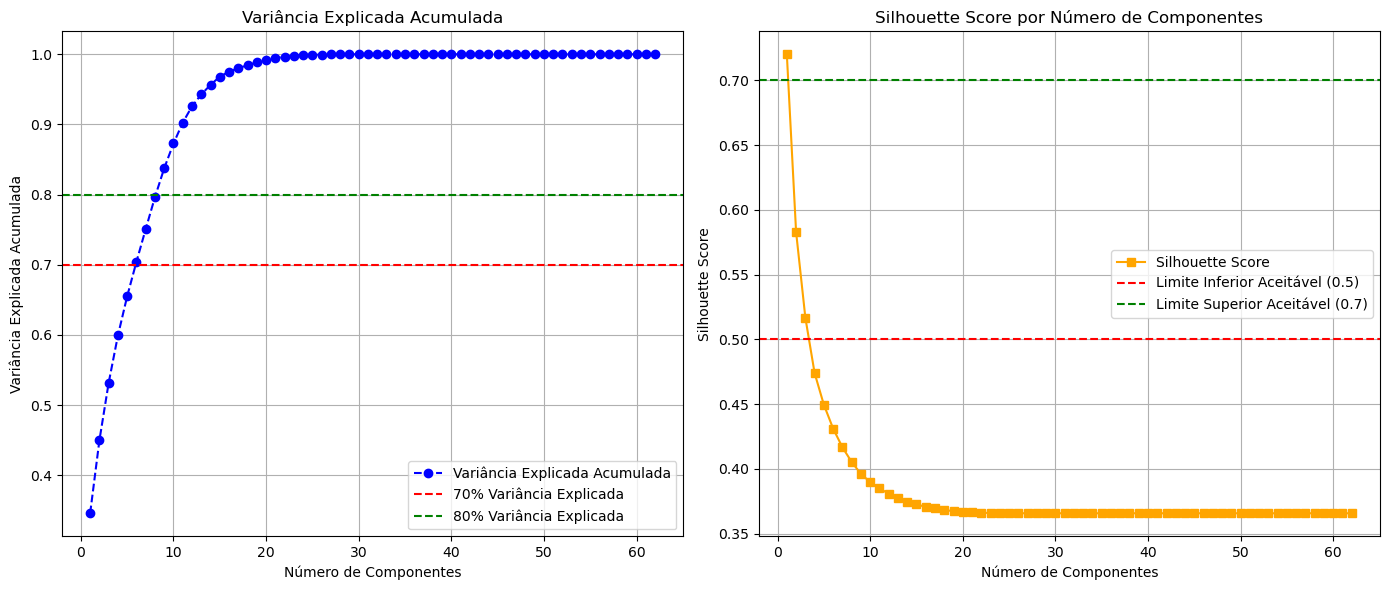

In [27]:

# Ajustar os gráficos conforme os resultados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Variância Explicada Acumulada
ax1.plot(resultados_pca['n_componentes'], resultados_pca['var_exp_acumulada'], marker='o', linestyle='--', color='b', label='Variância Explicada Acumulada')
ax1.axhline(y=0.70, color='r', linestyle='--', label='70% Variância Explicada')
ax1.axhline(y=0.80, color='g', linestyle='--', label='80% Variância Explicada')
ax1.set_xlabel('Número de Componentes')
ax1.set_ylabel('Variância Explicada Acumulada')
ax1.set_title('Variância Explicada Acumulada')
ax1.legend(loc='best')
ax1.grid(True)

# Gráfico 2: Silhouette Score
ax2.plot(resultados_pca['n_componentes'], resultados_pca['silhouette_score'], marker='s', linestyle='-', color='orange', label='Silhouette Score')
ax2.axhline(y=0.50, color='r', linestyle='--', label='Limite Inferior Aceitável (0.5)')
ax2.axhline(y=0.70, color='g', linestyle='--', label='Limite Superior Aceitável (0.7)')
ax2.set_xlabel('Número de Componentes')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score por Número de Componentes')
ax2.legend(loc='best')
ax2.grid(True)

plt.tight_layout()
plt.show()


In [28]:
# Exibir a quantidade de variância explicada pelos componentes
print(f'Variância explicada pelos componentes principais: {pca_componentes.explained_variance_ratio_}')
print(f'Número de componentes selecionados: {pca_componentes.n_components_}')


Variância explicada pelos componentes principais: [0.34582559 0.10396203]
Número de componentes selecionados: 2


In [29]:
# Explicação dinâmica do que o PCA fez no DataFrame
print("\nO PCA (Principal Component Analysis) é uma técnica de redução de dimensionalidade.")
print(f"Neste caso, o PCA reduziu o número de dimensões de {df.shape[1]} (colunas originais) para {pca_componentes.n_components_} componentes principais.")
print("Esses componentes principais são combinações lineares das variáveis originais, formadas para maximizar a variância explicada nos dados.")


O PCA (Principal Component Analysis) é uma técnica de redução de dimensionalidade.
Neste caso, o PCA reduziu o número de dimensões de 62 (colunas originais) para 2 componentes principais.
Esses componentes principais são combinações lineares das variáveis originais, formadas para maximizar a variância explicada nos dados.


In [30]:
# Para formatar a explicação das colunas principais em cada componente
colunas_frequentes = set()  # Para armazenar as colunas que aparecem em todos os componentes
for i, component in enumerate(pca_componentes.components_):
    abs_component = abs(component)
    sorted_indices = abs_component.argsort()[::-1]  # Ordena pelas contribuições absolutas em ordem decrescente
    top_features = df.columns[sorted_indices[:3]]  # Pegando as 3 principais features
    print(f"As principais colunas para o Componente {i+1} são: {', '.join(top_features)}")
    print(f"Este componente explica {explained_variance_ratio[i]*100:.2f}% da variância.")
    
    # Armazenando as colunas frequentes
    if i == 0:
        colunas_frequentes = set(top_features)  # Inicia com as colunas do primeiro componente
    else:
        colunas_frequentes.intersection_update(set(top_features))  # Mantém apenas as colunas presentes em todos os componentes




As principais colunas para o Componente 1 são: PROD_CESTA_RELACIONAMENTO_N, PROD_CESTA_RELACIONAMENTO_S, PROD_CANAIS_S
Este componente explica 34.58% da variância.
As principais colunas para o Componente 2 são: PROD_POUPANCA_N, PROD_POUPANCA_S, PROD_DEPOSITO_A_PRAZO_N
Este componente explica 10.40% da variância.


In [31]:
# Variância explicada
variancia_total = sum(pca_componentes.explained_variance_ratio_) * 100
print(f"A redução dimensional resultou em uma retenção de {variancia_total:.2f}% da variância total dos dados.")
print(f"Isto significa que {100 - variancia_total:.2f}% da informação original foi descartada, mas a maior parte dos padrões presentes no conjunto de dados foi preservada.")

A redução dimensional resultou em uma retenção de 44.98% da variância total dos dados.
Isto significa que 55.02% da informação original foi descartada, mas a maior parte dos padrões presentes no conjunto de dados foi preservada.


In [32]:
# Dados redundantes e impacto
print("\nAo aplicar o PCA, eliminamos redundâncias causadas por variáveis altamente correlacionadas,")
print("o que ajuda a simplificar o problema, evitando que o modelo de clusterização seja influenciado por essas correlações desnecessárias.")
print(f"A redução de variáveis facilita a clusterização, tornando o processo mais eficiente e ajudando a prevenir o overfitting.")
print(f"No entanto, uma pequena quantidade de informação pode ser perdida ({100 - variancia_total:.2f}% da variância), o que é aceitável se a variância retida for alta o suficiente para capturar os principais padrões dos dados.")



Ao aplicar o PCA, eliminamos redundâncias causadas por variáveis altamente correlacionadas,
o que ajuda a simplificar o problema, evitando que o modelo de clusterização seja influenciado por essas correlações desnecessárias.
A redução de variáveis facilita a clusterização, tornando o processo mais eficiente e ajudando a prevenir o overfitting.
No entanto, uma pequena quantidade de informação pode ser perdida (55.02% da variância), o que é aceitável se a variância retida for alta o suficiente para capturar os principais padrões dos dados.


In [33]:
# Impacto na clusterização
print("\nO impacto dessa transformação no processo de clusterização é que agora os clusters serão formados com base nas características mais importantes dos dados,")
print("aquelas que realmente explicam a variabilidade entre os pontos. Isso pode resultar em uma segmentação mais precisa e coesa,")
print("com menos influência de 'ruído' ou variáveis que não contribuem significativamente para a separação entre os grupos.")
print(f"A margem fidedigna das informações retidas é de {variancia_total:.2f}%, o que é considerado alto e deve garantir uma boa representação dos dados originais.")


O impacto dessa transformação no processo de clusterização é que agora os clusters serão formados com base nas características mais importantes dos dados,
aquelas que realmente explicam a variabilidade entre os pontos. Isso pode resultar em uma segmentação mais precisa e coesa,
com menos influência de 'ruído' ou variáveis que não contribuem significativamente para a separação entre os grupos.
A margem fidedigna das informações retidas é de 44.98%, o que é considerado alto e deve garantir uma boa representação dos dados originais.


### METODO DE ELBOW 

In [34]:
# Definir a lista de número de clusters (por exemplo, de 2 a 12 clusters)
num_clusters = list(range(2, 12))

In [35]:
# Listas para armazenar os valores de inércia e silhouette score para cada número de clusters
inertia = []
silhouette_scores = []
centroids = []
k_euclid = []
dist = []
soma_quadrado_intra_cluster = []
soma_quadrados_entre_cluster = []

In [36]:
# Calcular a inércia e o silhouette score para cada número de clusters
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    kmeans.fit(pca)  # Aplicar o KMeans no conjunto de dados transformados pelo PCA
    
    # Adicionar inércia
    inertia.append(kmeans.inertia_)
    
    # Só calcular o silhouette score se o número de clusters for maior que 1
    if k > 1:
        score = silhouette_score(pca, kmeans.labels_)
        silhouette_scores.append(score)
    
    # Armazenar os centróides do cluster
    centroids.append(kmeans.cluster_centers_)
    
    # Calcular as distâncias euclidianas para cada número de clusters
    k_euclid = cdist(pca, kmeans.cluster_centers_, 'euclidean')
    dist.append(np.min(k_euclid, axis=1))
    
    # Soma dos quadrados intra-cluster
    soma_quadrado_intra_cluster.append(sum(dist[-1]**2))

# Verificar resultados
print(f"Inércia: {inertia}")
print(f"Silhouette Scores: {silhouette_scores}")
print(f"Soma dos quadrados intra-cluster: {soma_quadrado_intra_cluster}")

Inércia: [49924.69290224582, 32969.37205410238, 21577.096857923665, 15843.749823212353, 11971.03763937982, 9683.658170112833, 8237.801908987616, 7952.308433322583, 6759.142379307391, 6102.217221867492]
Silhouette Scores: [0.5829227810014119, 0.5839622994413238, 0.5966283383987612, 0.6008421810153477, 0.613540395991882, 0.6115722274371268, 0.6058344675331878, 0.5931892801695934, 0.5904400753635141, 0.5954136199918074]
Soma dos quadrados intra-cluster: [49924.69290223486, 32969.37205410544, 21577.09685792243, 15843.74982320749, 11971.037639377717, 9683.658170112698, 8237.801908989579, 7952.308433320894, 6759.142379305886, 6102.217221866411]


In [37]:
# Soma total dos quadrados
soma_total = sum(pdist(pca)**2) / pca.shape[0]

In [38]:
# Soma dos quadrados entre os clusters
soma_quadrados_entre_cluster = [soma_total - intra for intra in soma_quadrado_intra_cluster]


In [39]:
# Agora os comprimentos de num_clusters, inertia e silhouette_scores serão iguais
#(f"Tamanho de num_clusters: {len(num_clusters)}")
print(f"Tamanho de inertia: {len(inertia)}")
print(f"Tamanho de silhouette_scores: {len(silhouette_scores)}")

# Exibir as somas dos quadrados intra e entre clusters
print(f"Soma dos quadrados intra-cluster: {soma_quadrado_intra_cluster}")
print(f"Soma dos quadrados entre-cluster: {soma_quadrados_entre_cluster}")

Tamanho de inertia: 10
Tamanho de silhouette_scores: 10
Soma dos quadrados intra-cluster: [49924.69290223486, 32969.37205410544, 21577.09685792243, 15843.74982320749, 11971.037639377717, 9683.658170112698, 8237.801908989579, 7952.308433320894, 6759.142379305886, 6102.217221866411]
Soma dos quadrados entre-cluster: [82392.89242290576, 99348.21327103517, 110740.4884672182, 116473.83550193314, 120346.54768576291, 122633.92715502792, 124079.78341615104, 124365.27689181973, 125558.44294583474, 126215.36810327422]


### RESULTADO ELBOW 

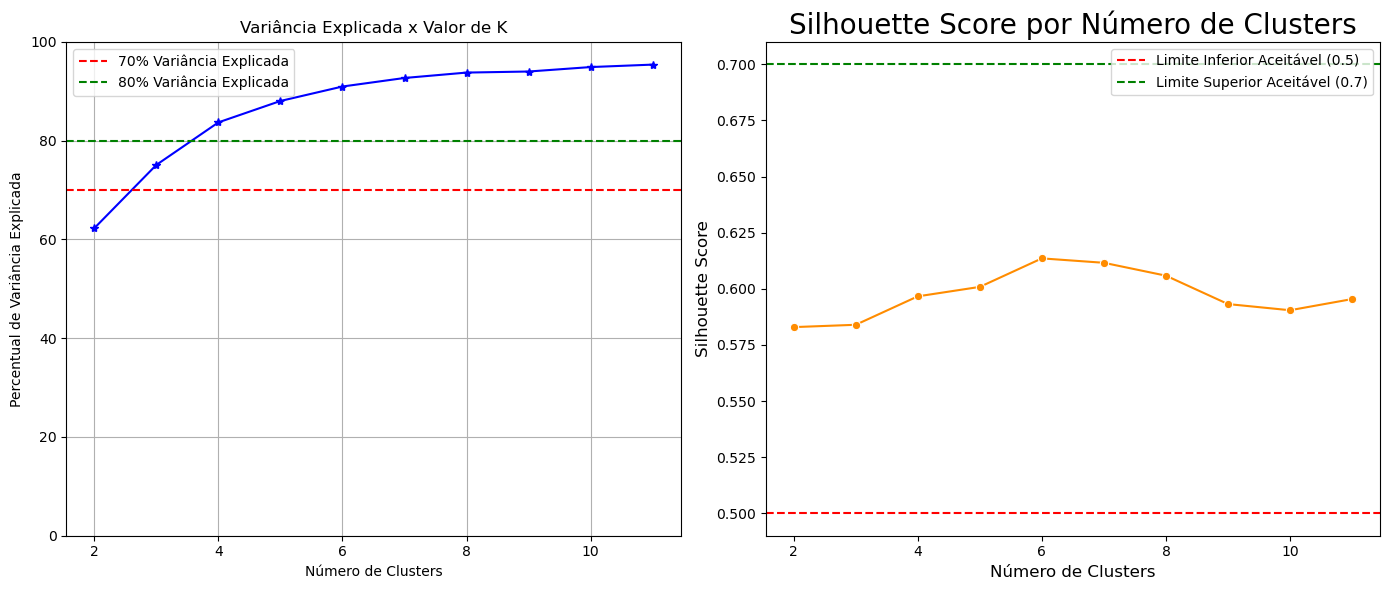

In [40]:
# Verifique o tamanho de num_clusters e soma_quadrados_entre_cluster para garantir o mesmo comprimento
num_clusters = num_clusters[:len(soma_quadrados_entre_cluster)]  # Ajustar para ter o mesmo comprimento

# Plotar os dois gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Variância Explicada
ax1.plot(num_clusters, soma_quadrados_entre_cluster[:len(num_clusters)]/soma_total * 100, 'b*-')
ax1.set_ylim((0, 100))
ax1.grid(True)
ax1.axhline(y=70, color='r', linestyle='--', label='70% Variância Explicada')
ax1.axhline(y=80, color='g', linestyle='--', label='80% Variância Explicada')
ax1.set_xlabel('Número de Clusters')
ax1.set_ylabel('Percentual de Variância Explicada')
ax1.set_title('Variância Explicada x Valor de K')
ax1.legend(loc='best')

# Gráfico 2: Silhouette Score
sns.lineplot(x=num_clusters, y=silhouette_scores[:len(num_clusters)], color='darkorange', marker='o', ax=ax2)
ax2.axhline(y=0.50, color='r', linestyle='--', label='Limite Inferior Aceitável (0.5)')
ax2.axhline(y=0.70, color='g', linestyle='--', label='Limite Superior Aceitável (0.7)')
ax2.set_xlabel('Número de Clusters', size=12)
ax2.set_ylabel('Silhouette Score', size=12)
ax2.set_title('Silhouette Score por Número de Clusters', size=20)
ax2.legend(loc='best')

# Exibir os gráficos
plt.tight_layout()
plt.show()


In [41]:
# Loop para calcular o silhouette score para diferentes números de clusters
for k in num_clusters:
    modelo = KMeans(n_clusters=k, random_state=42, init='k-means++')  # Ajustar o número de clusters
    labels = modelo.fit_predict(pca)  # Fit e predict com o modelo
    acuracia = silhouette_score(pca, labels, metric='euclidean')  # Calcular o silhouette score
    silhouette_scores.append(acuracia)  # Armazenar o score
    print(f"Número de clusters: {k}, Acurácia (Silhouette Score): {acuracia}")

# Exibir o número de clusters com o melhor Silhouette Score
best_num_clusters = num_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"Melhor número de clusters com base no Silhouette Score: {best_num_clusters}")

Número de clusters: 2, Acurácia (Silhouette Score): 0.5829227810014119
Número de clusters: 3, Acurácia (Silhouette Score): 0.5839622994413238
Número de clusters: 4, Acurácia (Silhouette Score): 0.5966283383987612
Número de clusters: 5, Acurácia (Silhouette Score): 0.6008421810153477
Número de clusters: 6, Acurácia (Silhouette Score): 0.613540395991882
Número de clusters: 7, Acurácia (Silhouette Score): 0.6115722274371268
Número de clusters: 8, Acurácia (Silhouette Score): 0.6058344675331878
Número de clusters: 9, Acurácia (Silhouette Score): 0.5931892801695934
Número de clusters: 10, Acurácia (Silhouette Score): 0.5904400753635141
Número de clusters: 11, Acurácia (Silhouette Score): 0.5954136199918074
Melhor número de clusters com base no Silhouette Score: 6


In [42]:
# Exibir o melhor Silhouette Score e a inércia correspondente
best_silhouette = max(silhouette_scores)
best_clusters = num_clusters[silhouette_scores.index(best_silhouette)]
print(f"Melhor Silhouette Score: {best_silhouette}, Número de Clusters: {best_clusters}")


Melhor Silhouette Score: 0.613540395991882, Número de Clusters: 6


### MODELO CLUSTERIZAÇÃO

In [43]:
# Aplicando KMeans nos dados reduzidos pelo PCA
kmeans = KMeans(n_clusters=best_num_clusters, random_state=42, init='k-means++')

# Ajustando o KMeans com os dados transformados pelo PCA
y_pred_kmeans = kmeans.fit_predict(pca)  # Gerando os rótulos dos clusters

# Agora você pode acessar os labels dos clusters
kmeans_labels = kmeans.labels_


In [44]:

# Calculando as distâncias euclidianas dos pontos ao centroide do seu cluster
distances = cdist(pca, kmeans.cluster_centers_, 'euclidean')
# Tirando a menor distância (do centroide do cluster do ponto) para cada ponto
min_distances = np.min(distances, axis=1)

# Verificando as distâncias médias
print(f'Distância média ao centróide: {np.mean(min_distances)}')
print(f'Distância mínima ao centróide: {np.min(min_distances)}')
print(f'Distância máxima ao centróide: {np.max(min_distances)}')


Distância média ao centróide: 0.315432060386971
Distância mínima ao centróide: 0.011005337422386357
Distância máxima ao centróide: 1.3518001065874041


In [45]:
# Calcular o silhouette score para KMeans
if len(np.unique(y_pred_kmeans)) > 1:
    silhouette_kmeans = silhouette_score(pca, y_pred_kmeans)
    print(f'Silhouette Score para KMeans: {silhouette_kmeans}')
else:
    print("Silhouette Score não pode ser calculado, pois todos os pontos estão em um único cluster.")

Silhouette Score para KMeans: 0.613540395991882


In [46]:
# Calinski-Harabasz Index
chi = calinski_harabasz_score(pca, y_pred_kmeans)
print(f'Calinski-Harabasz Index: {chi}')

Calinski-Harabasz Index: 144781.42997734572


In [47]:
# Davies-Bouldin Index
dbi = davies_bouldin_score(pca, y_pred_kmeans)
print(f'Davies-Bouldin Index: {dbi}')

Davies-Bouldin Index: 0.6683812564560077


In [48]:
# Analisando Calinski-Harabasz Index
if chi > 2000:
    print(f"Calinski-Harabasz Index ({chi}) é excelente! Clusters muito bem separados.")
elif 1000 <= chi <= 2000:
    print(f"Calinski-Harabasz Index ({chi}) é bom. Clusters bem separados, mas há espaço para melhorar.")
else:
    print(f"Calinski-Harabasz Index ({chi}) é baixo. Clusters não estão bem separados e precisam de ajuste.")

Calinski-Harabasz Index (144781.42997734572) é excelente! Clusters muito bem separados.


In [49]:
# Análise dos Resultados
print("\nAnalisando os Resultados:")
# Analisando Davies-Bouldin Index
if dbi < 0.5:
    print(f"Davies-Bouldin Index ({dbi}) é excelente! Clusters muito bem separados e compactos.")
elif 0.5 <= dbi <= 1:
    print(f"Davies-Bouldin Index ({dbi}) é bom. Clusters bem definidos, mas pode haver um pouco de sobreposição.")
else:
    print(f"Davies-Bouldin Index ({dbi}) é alto. Pode haver muita sobreposição entre clusters ou clusters mal formados.")



Analisando os Resultados:
Davies-Bouldin Index (0.6683812564560077) é bom. Clusters bem definidos, mas pode haver um pouco de sobreposição.


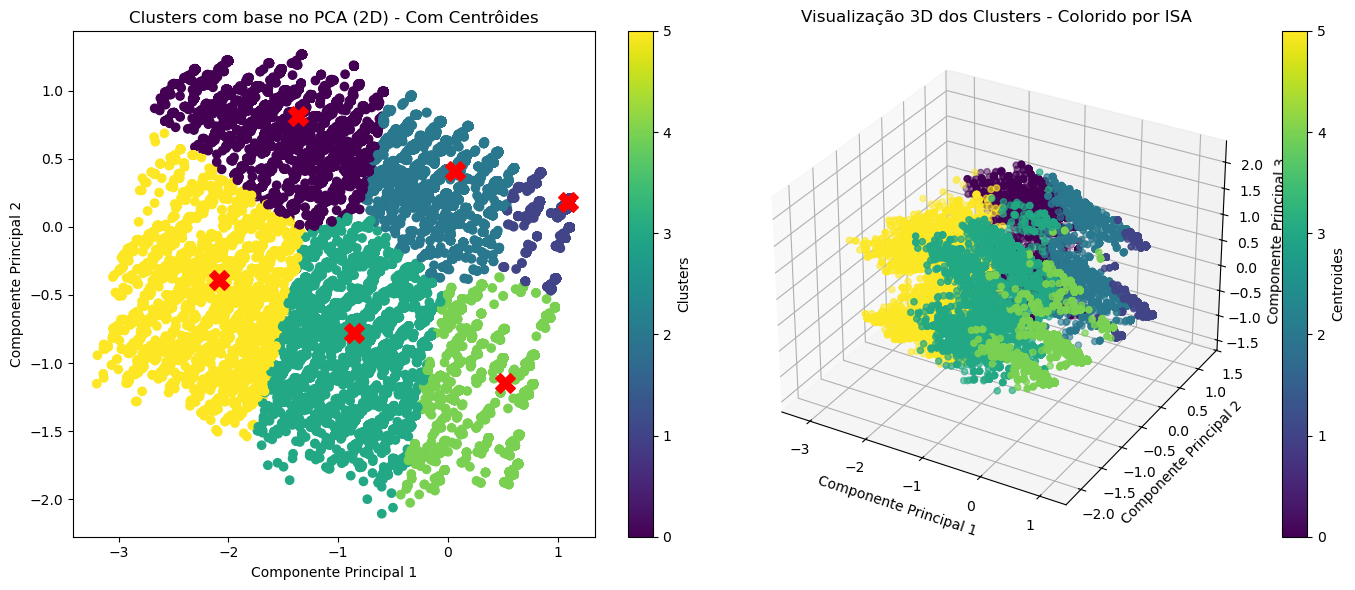

In [50]:

# Plotar os dois gráficos lado a lado
fig = plt.figure(figsize=(14, 6))

# Gráfico 2D: Visualizando os clusters e os centróides no plano 2D usando PCA
ax1 = fig.add_subplot(121)
sc1 = ax1.scatter(pca[:, 0], pca[:, 1], c=kmeans.labels_, cmap='viridis')  # Colorir pelos clusters
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroides')  # Adicionar os centróides
ax1.set_title("Clusters com base no PCA (2D) - Com Centrôides")
ax1.set_xlabel("Componente Principal 1")
ax1.set_ylabel("Componente Principal 2")
fig.colorbar(sc1, ax=ax1, label="Clusters")

# Refazendo o PCA com 3 componentes para visualização 3D
pca_3d = PCA(n_components=3)
pca_3d_data = pca_3d.fit_transform(df)  # Substitua df pelos seus dados

# Gerando o gráfico 3D
ax2 = fig.add_subplot(122, projection='3d')
sc2 = ax2.scatter(pca_3d_data[:, 0], pca_3d_data[:, 1], pca_3d_data[:, 2], c= kmeans.labels_, cmap='viridis')  # Colorir pela coluna ISI
ax2.set_xlabel('Componente Principal 1')
ax2.set_ylabel('Componente Principal 2')
ax2.set_zlabel('Componente Principal 3')
ax2.set_title('Visualização 3D dos Clusters - Colorido por ISA')
fig.colorbar(sc2, ax=ax2, label="Centroides")

# Exibir os gráficos
plt.tight_layout()
plt.show()


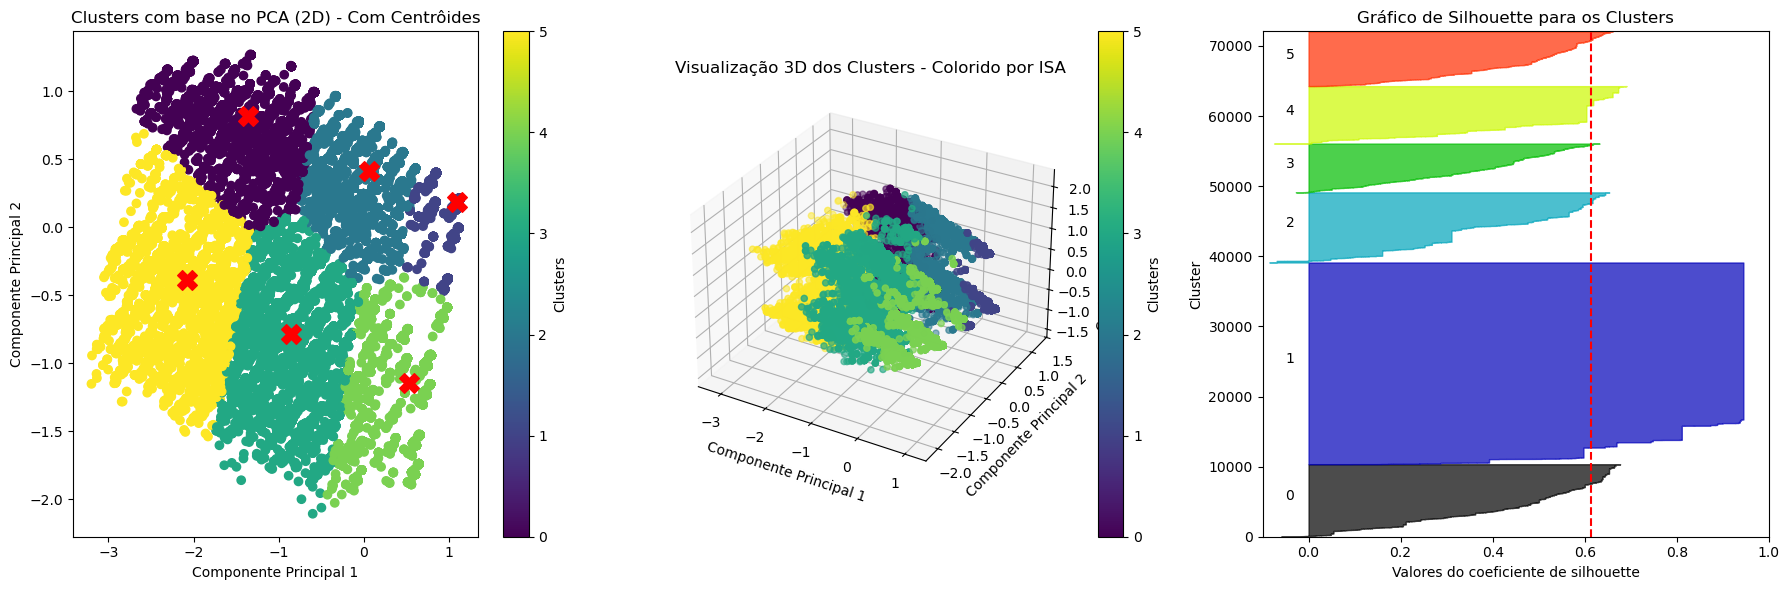

In [51]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples
import numpy as np
import matplotlib.cm as cm

# Ajustar o tamanho da figura para exibir os três gráficos lado a lado
fig = plt.figure(figsize=(18, 6))

# Gráfico 2D: Visualizando os clusters e os centróides no plano 2D usando PCA
ax1 = fig.add_subplot(131)
sc1 = ax1.scatter(pca[:, 0], pca[:, 1], c=kmeans.labels_, cmap='viridis')  # Colorir pelos clusters
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroides')  # Adicionar os centróides
ax1.set_title("Clusters com base no PCA (2D) - Com Centrôides")
ax1.set_xlabel("Componente Principal 1")
ax1.set_ylabel("Componente Principal 2")
fig.colorbar(sc1, ax=ax1, label="Clusters")

# Refazendo o PCA com 3 componentes para visualização 3D
pca_3d = PCA(n_components=3)
pca_3d_data = pca_3d.fit_transform(df)  # Substitua df pelos seus dados

# Gerando o gráfico 3D
ax2 = fig.add_subplot(132, projection='3d')
sc2 = ax2.scatter(pca_3d_data[:, 0], pca_3d_data[:, 1], pca_3d_data[:, 2], c=kmeans.labels_, cmap='viridis')  # Colorir pela coluna ISA
ax2.set_xlabel('Componente Principal 1')
ax2.set_ylabel('Componente Principal 2')
ax2.set_zlabel('Componente Principal 3')
ax2.set_title('Visualização 3D dos Clusters - Colorido por ISA')
fig.colorbar(sc2, ax=ax2, label="Clusters")

# Gráfico de Silhouette
ax3 = fig.add_subplot(133)
y_lower = 10
sample_silhouette_values = silhouette_samples(pca, kmeans.labels_)

# Configurar limites do gráfico de Silhouette
ax3.set_xlim([-0.1, 1])
ax3.set_ylim([0, len(pca) + (kmeans.n_clusters + 1) * 10])

for i in range(kmeans.n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / kmeans.n_clusters)
    ax3.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label dos clusters no meio
    ax3.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 para espaço entre clusters

# Linha vertical do valor médio do Silhouette Score
silhouette_avg = sample_silhouette_values.mean()
ax3.axvline(x=silhouette_avg, color="red", linestyle="--")

ax3.set_title("Gráfico de Silhouette para os Clusters")
ax3.set_xlabel("Valores do coeficiente de silhouette")
ax3.set_ylabel("Cluster")

# Ajuste do layout para evitar sobreposição de elementos
plt.tight_layout()
plt.show()
